https://www.kaggle.com/code/anubhavgoyal10/laptop-price-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge, Lasso

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Laptop_Price.csv")

In [3]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [4]:
df.shape

(823, 19)

**2. Data Checks**
-  Checking missing values  
-  Checking duplicates  
-  Checking data types of each column  
-  Checking the number of unique values of each column  
-  Checking statistics of data set  
-  Checking various categories present in different categorical column

In [5]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [6]:
df.duplicated().sum()

21

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    object
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    object
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    object
 17  Nu

In [9]:
df.nunique()

brand                  8
processor_brand        3
processor_name        11
processor_gnrtn        8
ram_gb                 4
ram_type               6
ssd                    7
hdd                    4
os                     3
os_bit                 2
graphic_card_gb        5
weight                 3
warranty               4
Touchscreen            2
msoffice               2
Price                405
rating                 5
Number of Ratings    282
Number of Reviews    135
dtype: int64

In [10]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,802.000000,802.00000,802.000000
mean,76625.543641,299.84414,36.089776
std,45232.984422,1001.78442,118.313553
min,16990.000000,0.00000,0.000000
25%,45990.000000,0.00000,0.000000
50%,63990.000000,17.00000,2.000000
75%,89525.000000,140.25000,18.000000
max,441990.000000,15279.00000,1947.000000


**Insights**

- There are some outliers in all the 3 numerical columns
- No missing values in the dataset
et

In [11]:
numeric_features = df.select_dtypes(include = "int64").columns.to_list()
cat_features = df.select_dtypes(include = "object").columns.to_list()

## 3. Data Visualization

### 3.1 Histograms

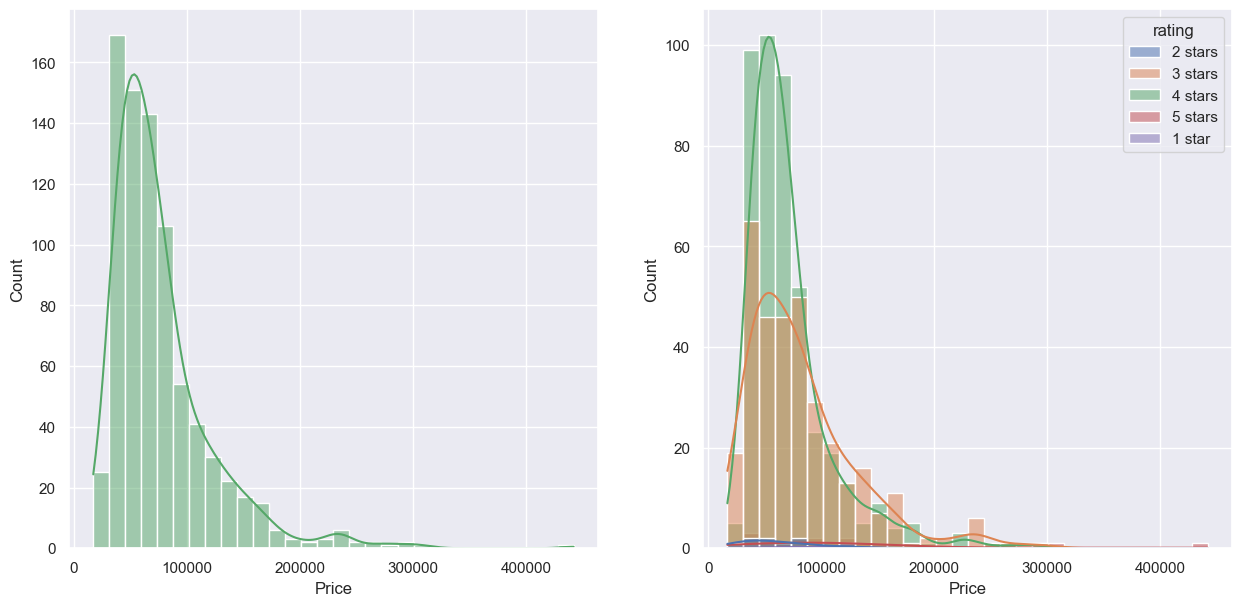

In [12]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))
sns.histplot(data = df, x = "Price", bins = 30, kde = True, color = "g", ax = plt.subplot(121))
sns.histplot(data = df, x = "Price", bins = 30, kde = True, color = "g", hue = "rating", ax = plt.subplot(122))
plt.show()

The primary difference between the two code snippets is how the subplots are created and referenced. Both snippets create two subplots side-by-side, but they use different methods to do so.

### First Code Snippet:

```python
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x="Price", bins=30, kde=True, color="g")

plt.subplot(122)
sns.histplot(data=df, x="Price", bins=30, kde=True, color="g", hue="rating")

plt.show()
```

### Second Code Snippet:

```python
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.histplot(data=df, x="Price", bins=30, kde=True, color="g", ax=axis[0])

sns.histplot(data=df, x="Price", bins=30, kde=True, color="g", hue="rating", ax=axis[1])

plt.show()
```

### Differences:

1. **Creating and Referencing Subplots**:
   - **First Code Snippet**: 
     - Uses `plt.subplot(121)` and `plt.subplot(122)` to create and switch to subplots directly. 
     - This method implicitly creates subplots but doesn't leverage the `axis` variable returned by `plt.subplots`.
   
   - **Second Code Snippet**: 
     - Uses the `axis` array returned by `plt.subplots` to directly reference and plot on each subplot.
     - This method explicitly assigns each subplot to an axis object (`axis[0]` and `axis[1]`).

2. **Assignment of Axes**:
   - **First Code Snippet**: 
     - Does not use the `axis` array created by `plt.subplots`. Instead, it relies on `plt.subplot` to implicitly manage subplot creation.
   
   - **Second Code Snippet**: 
     - Explicitly assigns each `sns.histplot` call to a specific axis in the `axis` array (`ax=axis[0]` and `ax=axis[1]`).

3. **Clarity and Flexibility**:
   - **First Code Snippet**: 
     - Less clear because it switches between subplots using `plt.subplot(121)` and `plt.subplot(122)`.
     - This approach is more manual and can be less intuitive, especially for larger grid layouts.
   
   - **Second Code Snippet**: 
     - More explicit and clear because it directly references subplots through the `axis` array.
     - This method is generally preferred for its readability and ease of managing multiple subplots.

### Summary:
While both snippets achieve the same result (two histograms side-by-side), the second snippet is more Pythonic and preferred in practice for its clarity and direct referencing of subplot axes. The second approach is also more scalable and easier to manage when dealing with larger grid layouts.

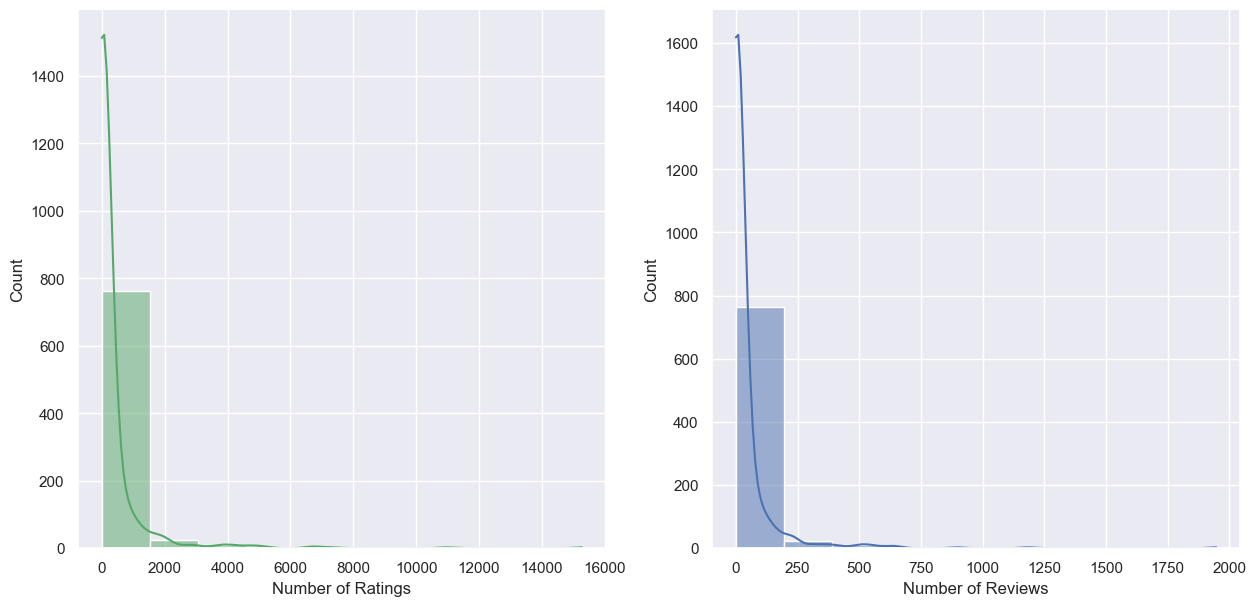

In [13]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = "Number of Ratings", bins = 10, kde = True, color = "g")
plt.subplot(122)
sns.histplot(data = df, x = "Number of Reviews", bins = 10, kde = True)
plt.show()

In [14]:
def remove_outliers(df, column):
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return df

In [15]:
df = remove_outliers(df, "Price")
df = remove_outliers(df, "Number of Ratings")
df = remove_outliers(df, "Number of Reviews")

### 3.2 Pie Charts and Multi Variate Analysis

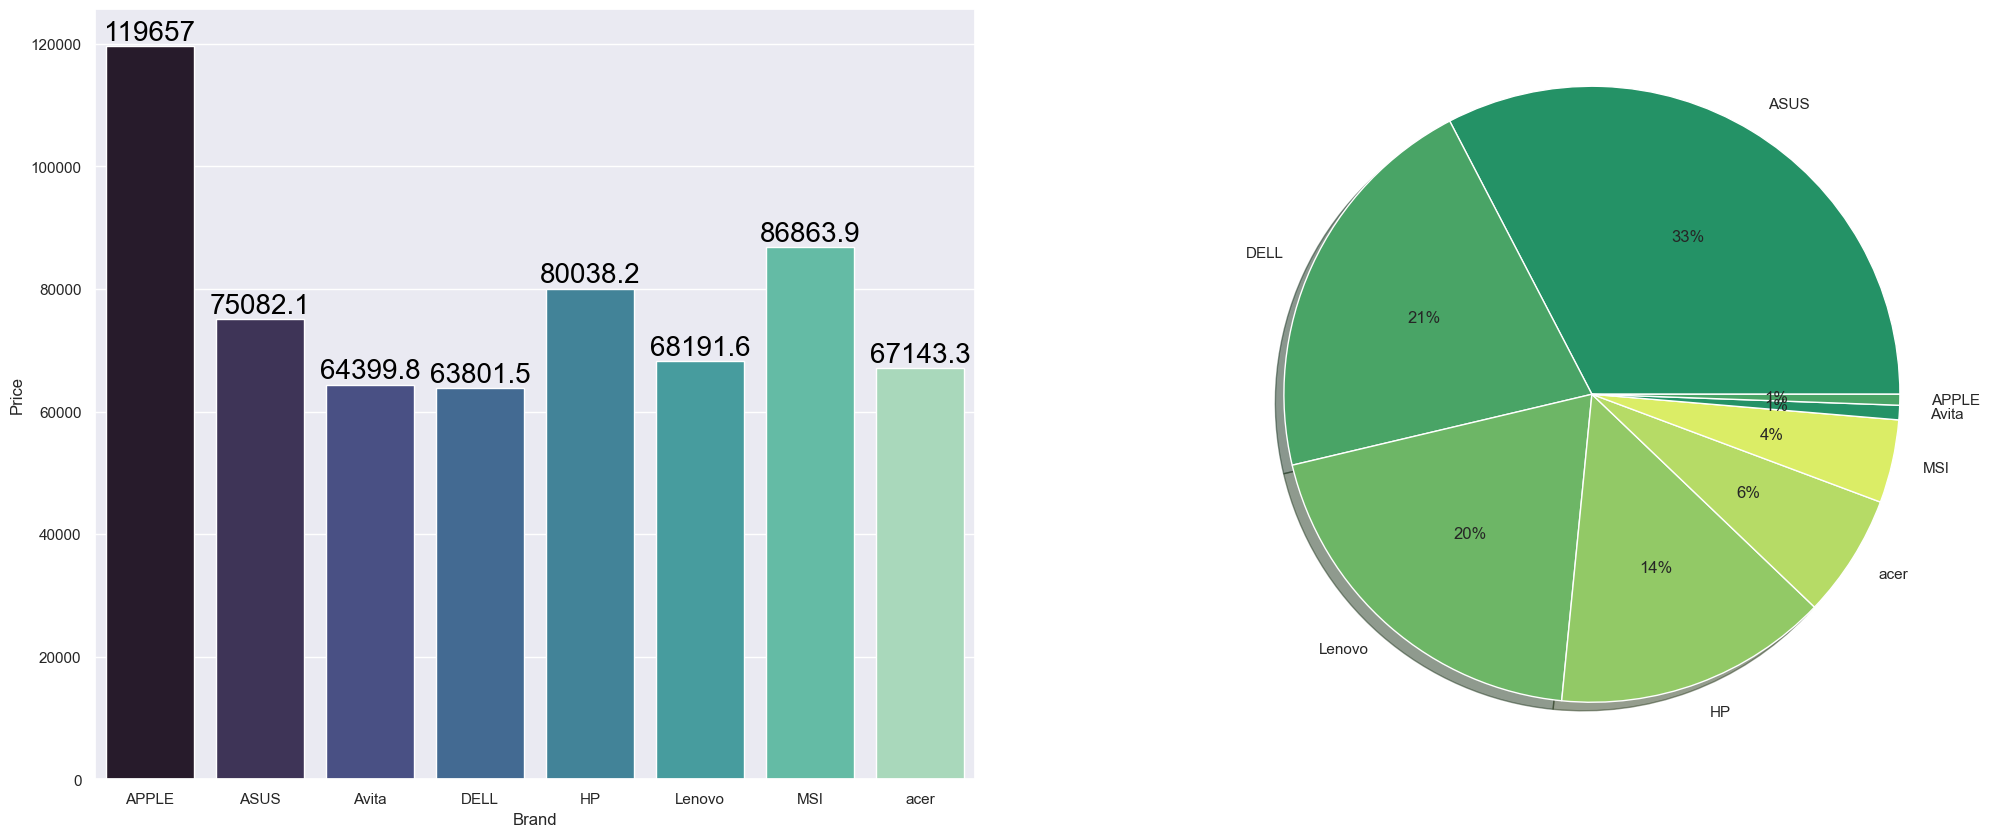

In [16]:
f, ax = plt.subplots(1, 2, figsize = (25, 10))
Group_data = df.groupby("brand")
sns.barplot(x = Group_data["Price"].mean().index, y = Group_data["Price"].mean().values, ax= ax[0],  palette = 'mako')

for container in ax[0].containers:
    ax[0].bar_label(container, color = "black", size = 20)

ax[0].set_xlabel("Brand")
ax[0].set_ylabel("Price")

palette_color = sns.color_palette('summer')

plt.pie(x = df["brand"].value_counts(), labels = df["brand"].value_counts().index, autopct = "%.0f%%", shadow = True, colors = palette_color)
plt.show() 

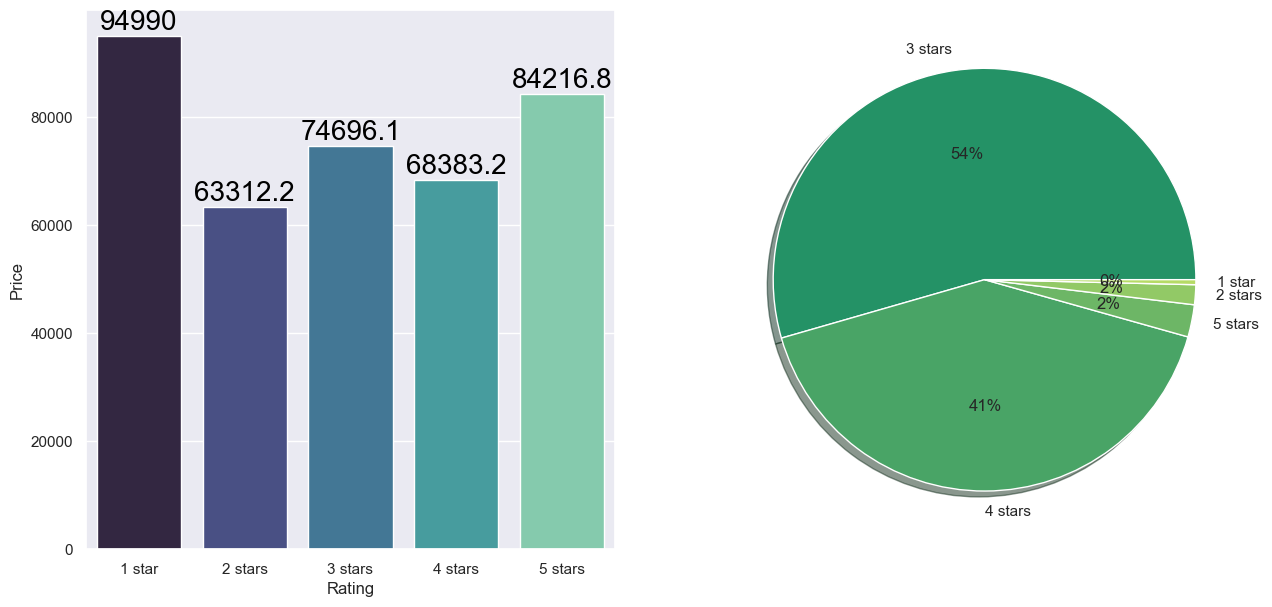

In [17]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
Group_data = df.groupby("rating")
sns.barplot(x = Group_data["Price"].mean().index, y = Group_data["Price"].mean().values, ax = ax[0], palette = "mako")

for container in ax[0].containers:
    ax[0].bar_label(container, color = "black", size = 20)

ax[0].set_xlabel("Rating")
ax[0].set_ylabel("Price")

palette_color = sns.color_palette('summer')

plt.pie(x = df["rating"].value_counts(), labels = df["rating"].value_counts().index, autopct = "%.0f%%", shadow = True, colors = palette_color)
plt.show()

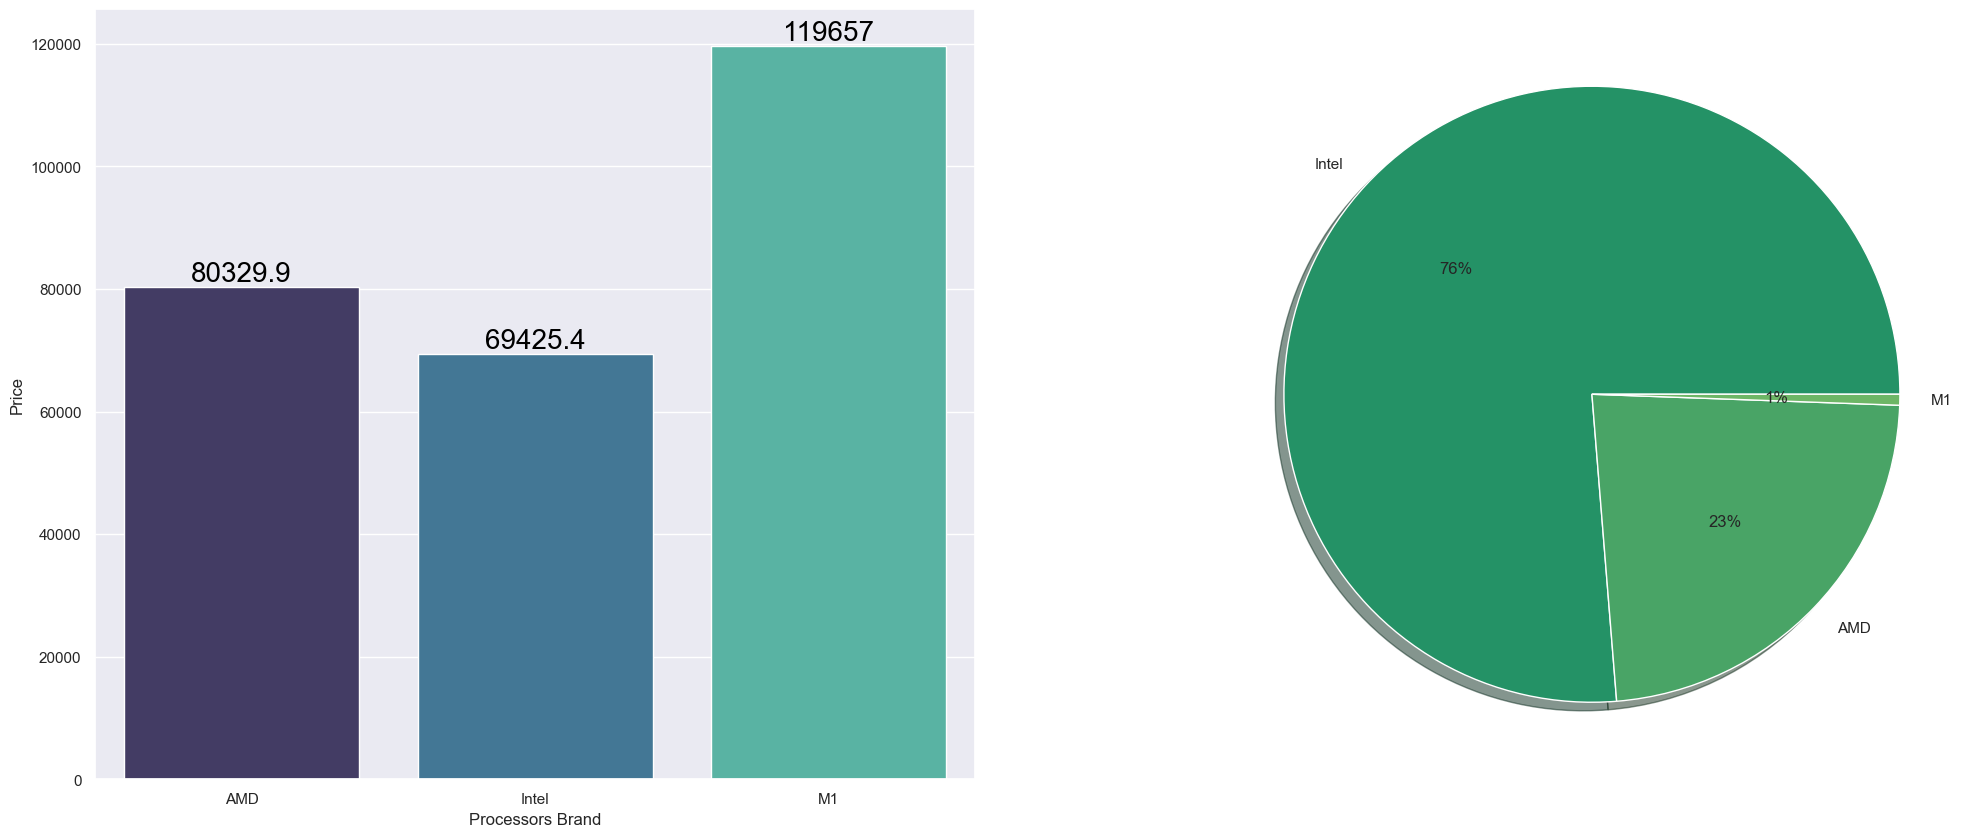

In [18]:
f,ax=plt.subplots(1,2,figsize=(25,10))
Group_data = df.groupby('processor_brand')
sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values,ax= ax[0],  palette = 'mako')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    ax[0].set_xlabel("Processors Brand")
    ax[0].set_ylabel("Price")
    
palette_color = sns.color_palette('summer')
plt.pie(x = df['processor_brand'].value_counts(),labels=df['processor_brand'].value_counts().index,autopct='%.0f%%',shadow=True, colors= palette_color)
plt.show()

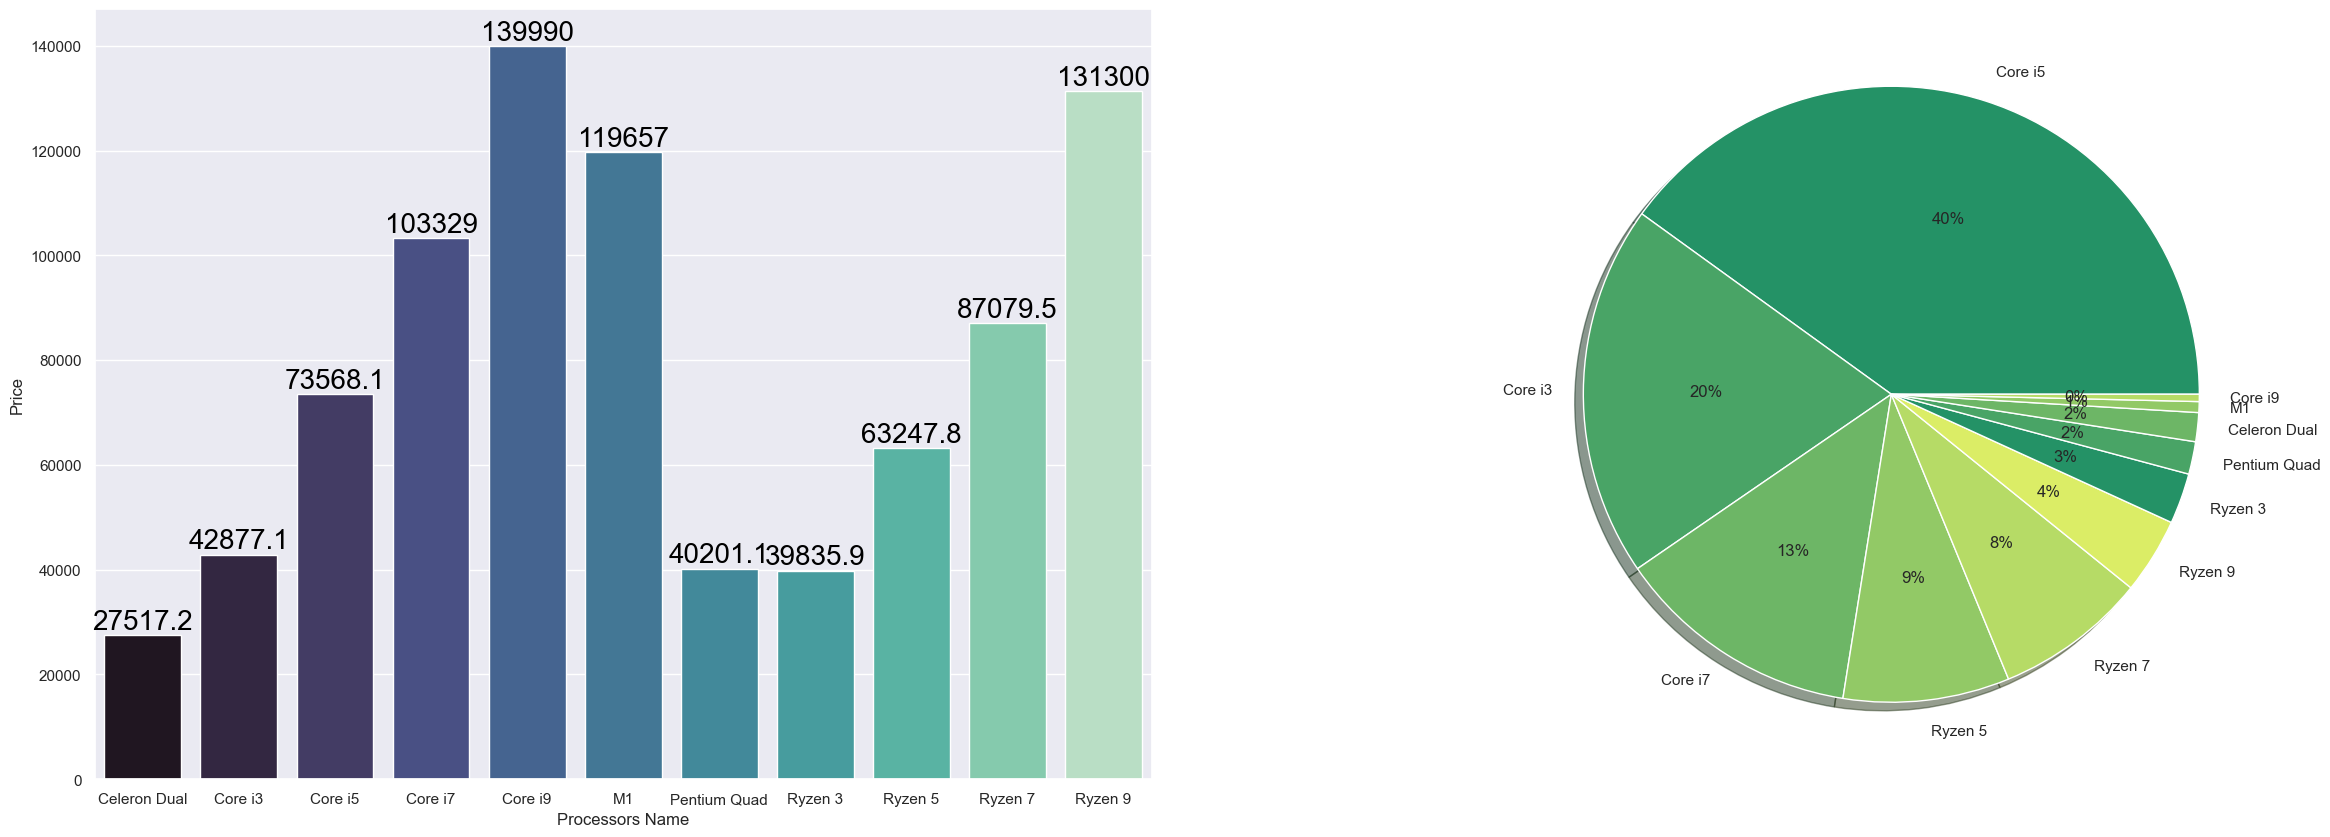

In [19]:
f,ax=plt.subplots(1,2,figsize=(30,10))
Group_data = df.groupby('processor_name')
sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values,ax= ax[0],  palette = 'mako')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    ax[0].set_xlabel("Processors Name")
    ax[0].set_ylabel("Price")
palette_color = sns.color_palette('summer')
plt.pie(x = df['processor_name'].value_counts(),labels=df['processor_name'].value_counts().index,autopct='%.0f%%',shadow=True, colors= palette_color)
plt.show() 

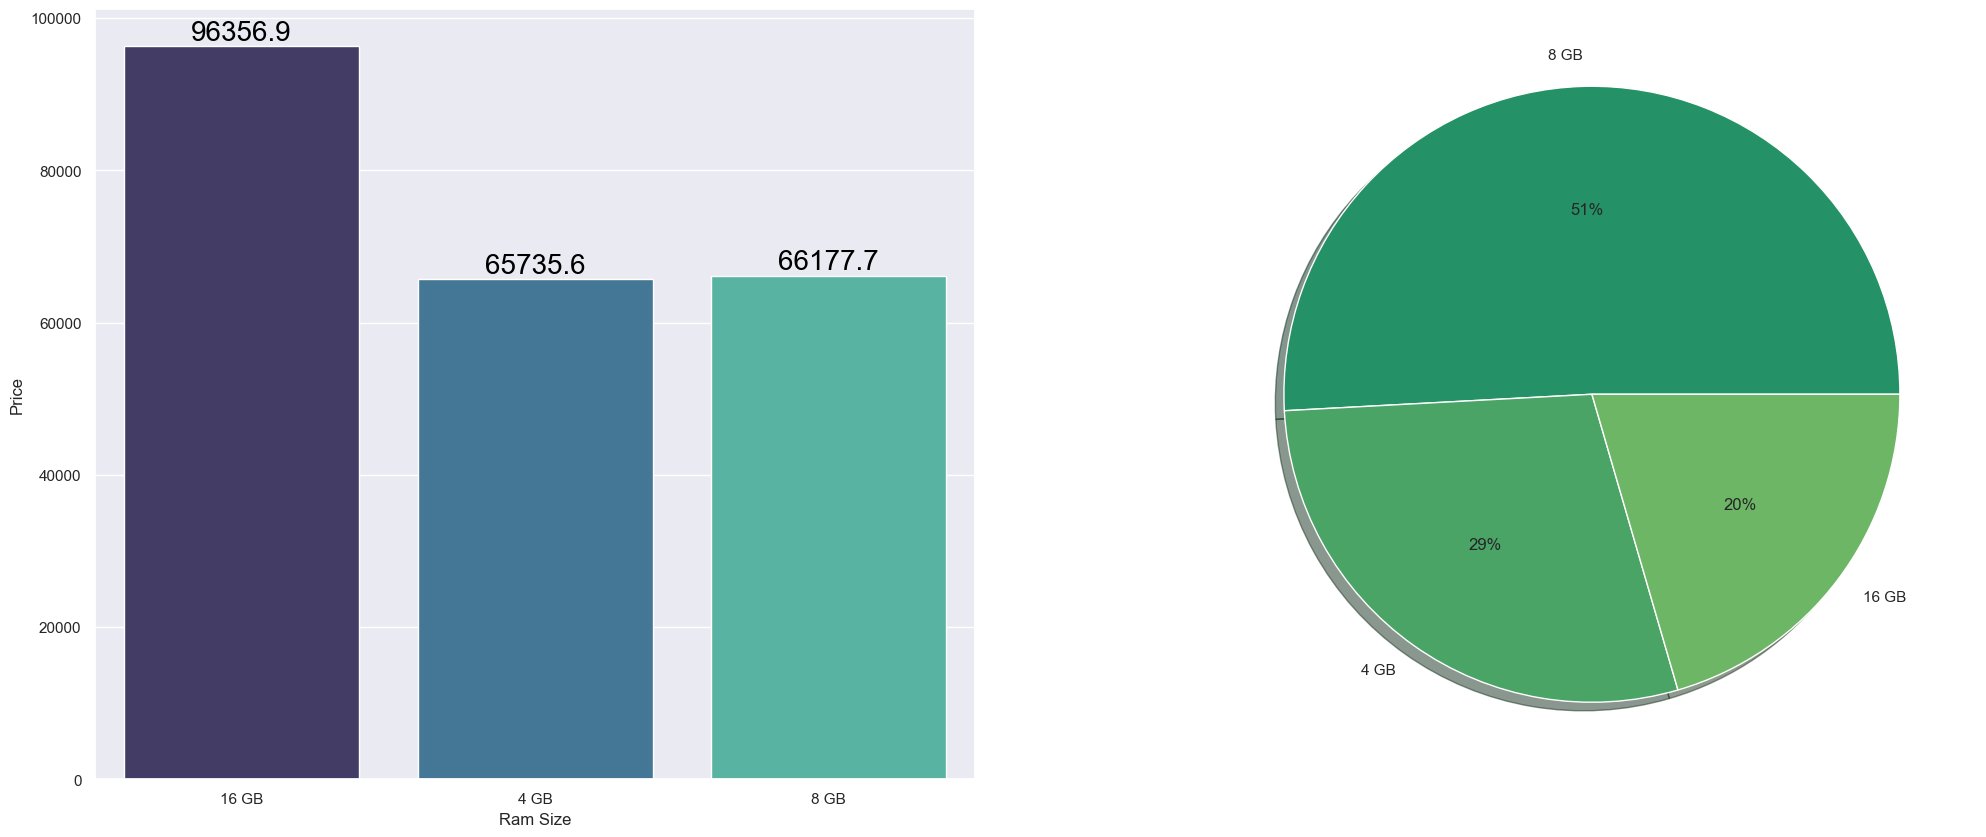

In [20]:
f,ax=plt.subplots(1,2,figsize=(25,10))
Group_data = df.groupby('ram_gb')
sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values,ax= ax[0],  palette = 'mako')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    ax[0].set_xlabel("Ram Size")
    ax[0].set_ylabel("Price")
palette_color = sns.color_palette('summer')
plt.pie(x = df['ram_gb'].value_counts(),labels=df['ram_gb'].value_counts().index,autopct='%.0f%%',shadow=True, colors= palette_color)
plt.show() 

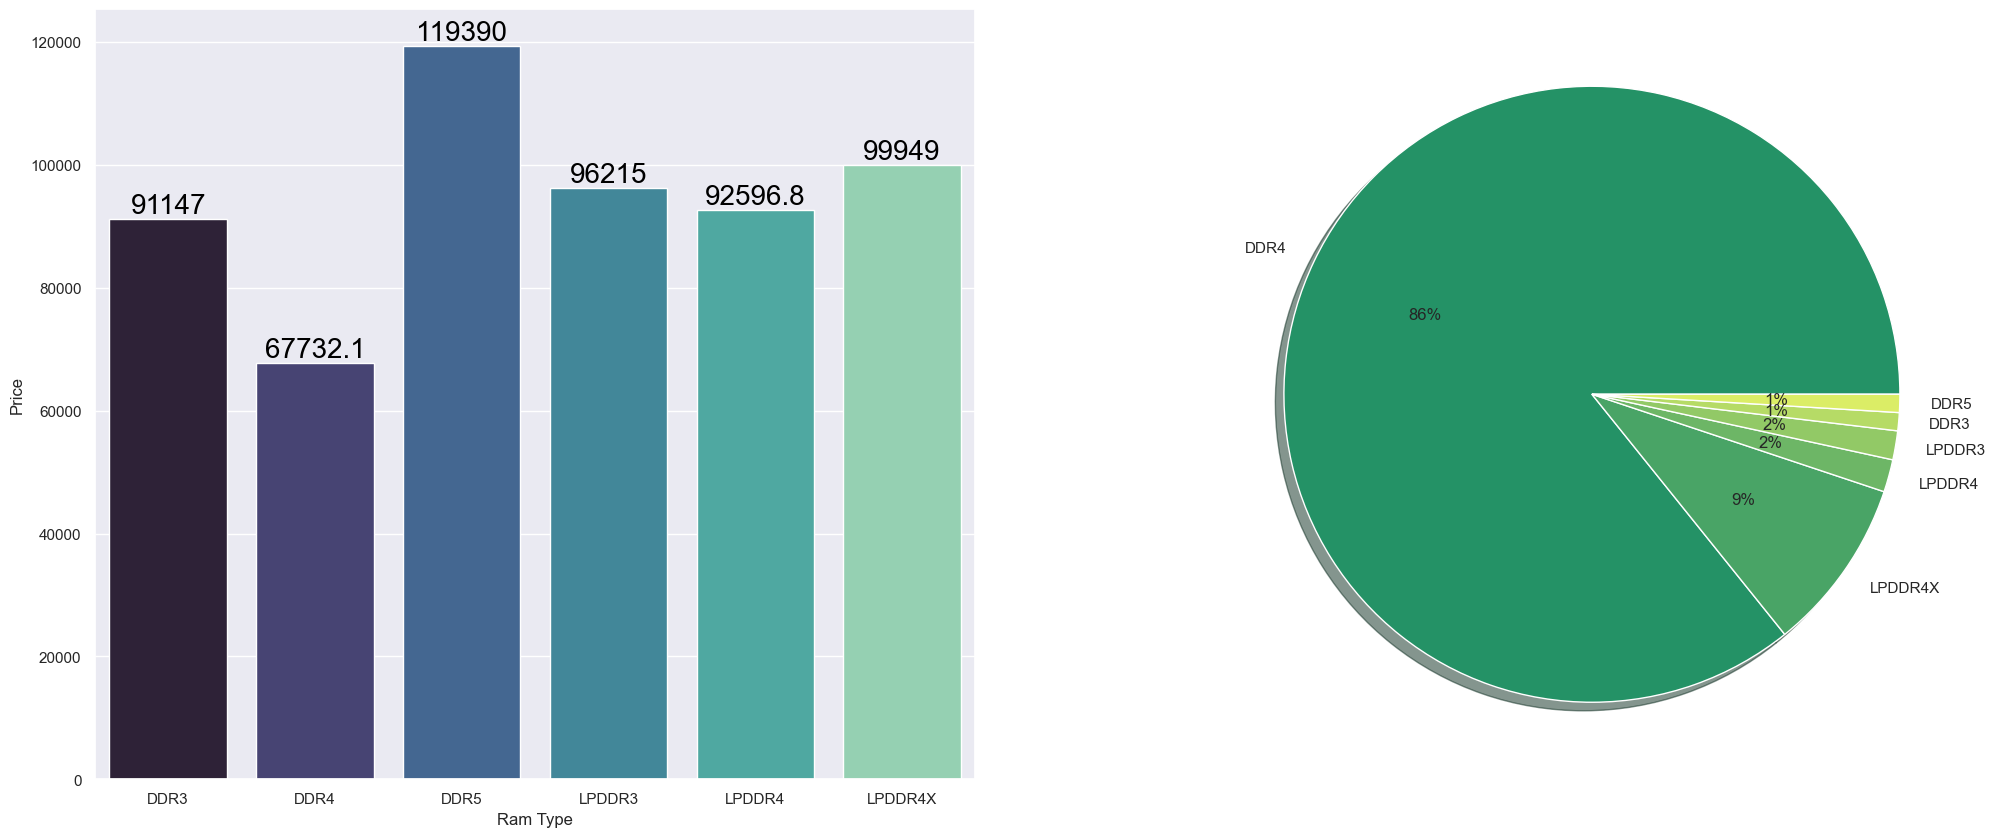

In [21]:
f, ax = plt.subplots(1, 2, figsize = (25, 10))
Group_data = df.groupby("ram_type")
sns.barplot(x = Group_data["Price"].mean().index, y = Group_data["Price"].mean().values, ax = ax[0], palette = "mako")

for container in ax[0].containers:
    ax[0].bar_label(container, color = "black", size = 20)
ax[0].set_xlabel("Ram Type")
ax[0].set_ylabel("Price")
palette_color = sns.color_palette("summer")

plt.pie(x = df["ram_type"].value_counts(), labels = df["ram_type"].value_counts().index, autopct = "%0.f%%", shadow = True, colors = palette_color)
plt.show()

Text(0, 0.5, 'Price')

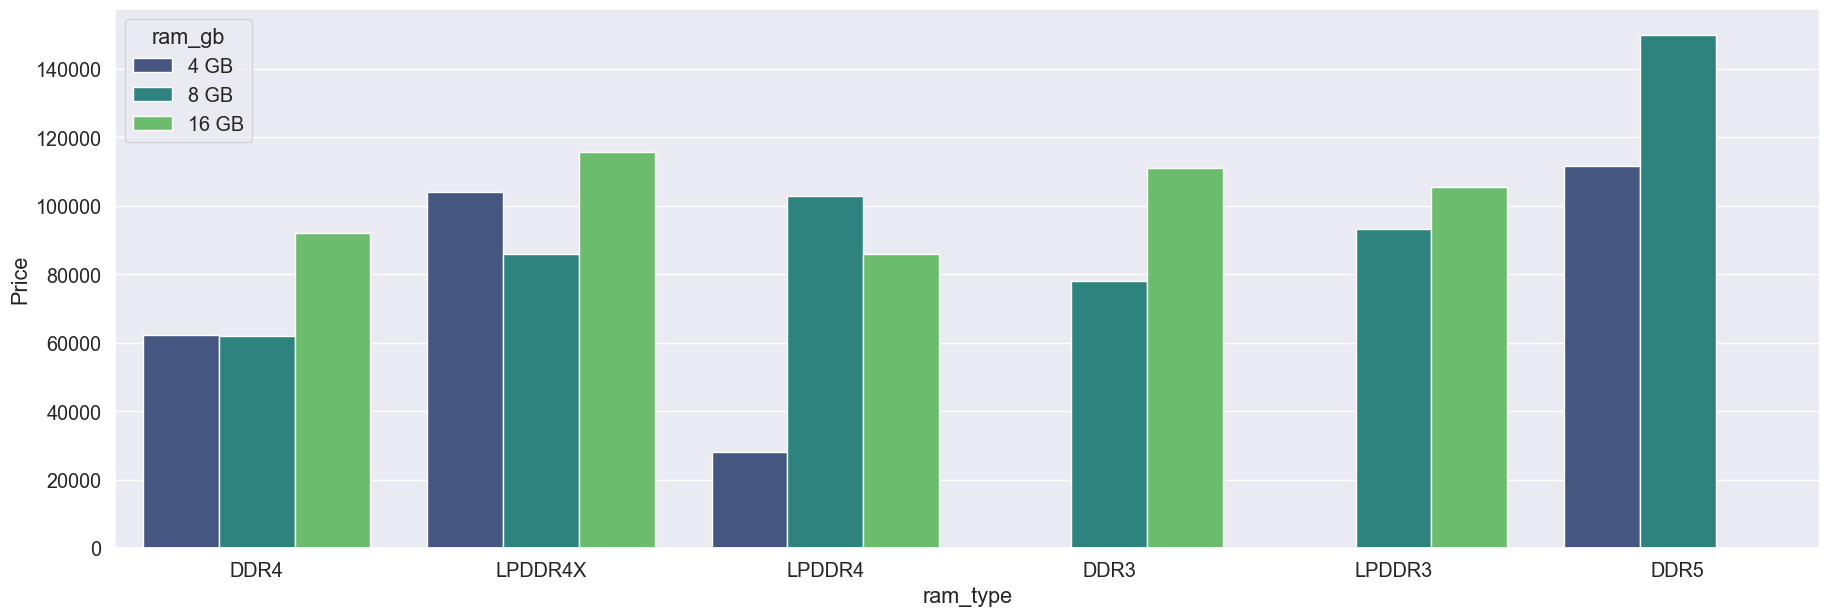

In [22]:
sns.set_context("notebook", font_scale = 1.3)
plt.figure(figsize = (22, 7))

ax = sns.barplot(x = df["ram_type"], y = df["Price"], hue = df["ram_gb"], palette = "viridis", ci = None)
plt.ylabel("Price")

Text(0, 0.5, 'Price')

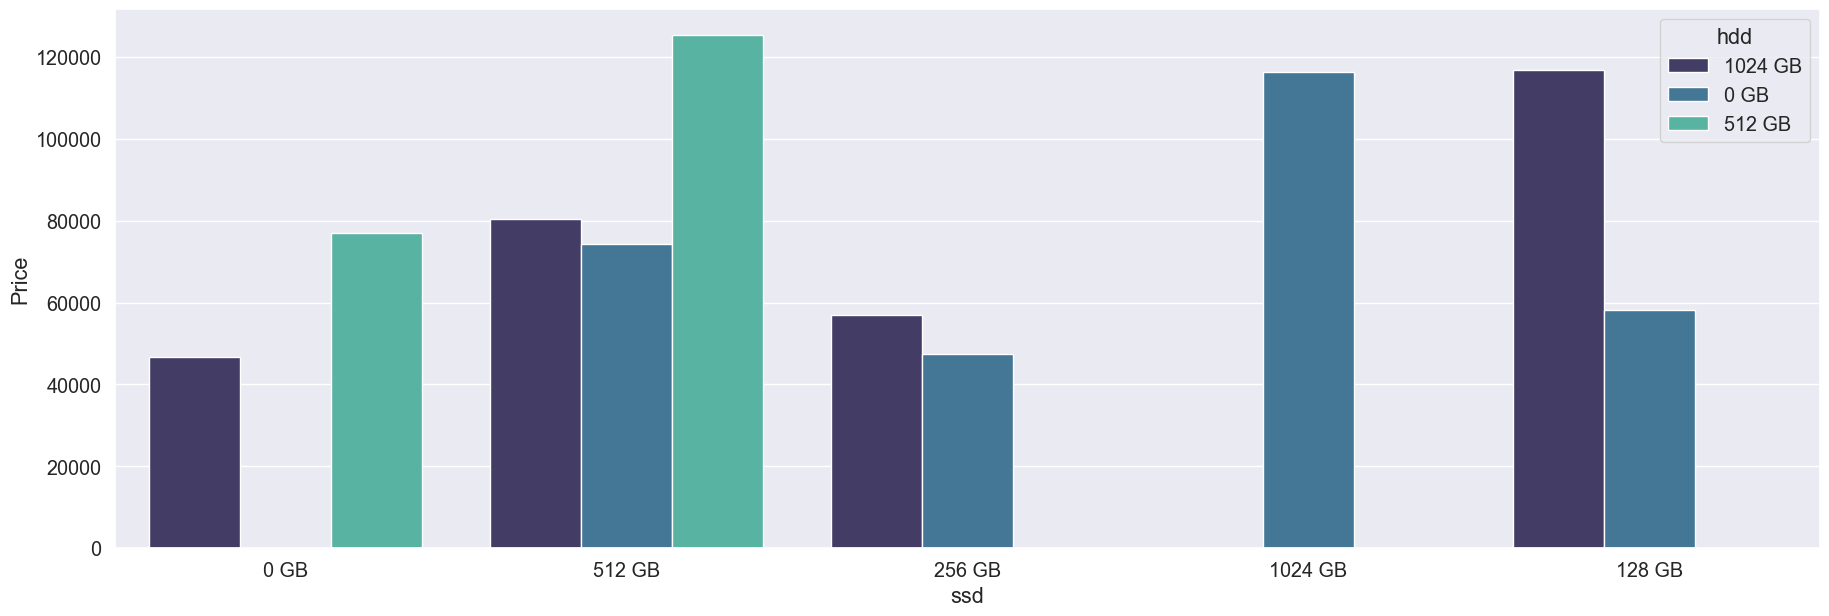

In [23]:
sns.set_context("notebook", font_scale = 1.3)
plt.figure(figsize = (22, 7))
ax = sns.barplot(x = df["ssd"], y = df["Price"], hue = df["hdd"], palette = "mako", ci = None)
plt.ylabel("Price")

## 4. Modelling

In [24]:
df = pd.get_dummies(df, drop_first = True)

In [25]:
df.head()

,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,34649,3,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,38999,65,5,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,39999,8,1,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
3,69990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,26990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [26]:
df = df.astype("int")

In [27]:
df.head()

,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,34649,3,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,38999,65,5,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,39999,8,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,69990,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,26990,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [28]:
X = df.drop('Price', axis = 1)
y = df.Price

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state= 1)
X_train.shape, X_test.shape

((474, 58), (53, 58))

In [30]:
models = {
    "ridge" : Ridge(),
    "xgboost" : XGBRegressor(),
    "catboost" : CatBoostRegressor(verbose = 0),
    "lightgbm": LGBMRegressor(),
    "gradient boosting" : GradientBoostingRegressor(),
    "lasso" : Lasso(),
    "random forest" : RandomForestRegressor(),
    "support vector" : SVR(),
    "ada boost regressor" : AdaBoostRegressor()
}

In [31]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained")

ridge trained
xgboost trained
catboost trained
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 35
[LightGBM] [Info] Start training from score 72042.677215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [32]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(79))
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss = "mse",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.RootMeanSquaredError(name = "rmse")]
)

model.fit(X_train.to_numpy(), y_train, validation_data = (X_test.to_numpy(), y_test), epochs = 50)


Epoch 1/50

15/15 [==============================] - 2s 18ms/step - loss: 6025601024.0000 - rmse: 77624.7422 - val_loss: 6206646272.0000 - val_rmse: 78782.2734
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 5713403904.0000 - rmse: 75587.0625 - val_loss: 5461511168.0000 - val_rmse: 73902.0391
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 4689009664.0000 - rmse: 68476.3438 - val_loss: 4483642880.0000 - val_rmse: 66960.0078
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 4480994304.0000 - rmse: 66940.2266 - val_loss: 4253950464.0000 - val_rmse: 65222.3164
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 4117213184.0000 - rmse: 64165.5156 - val_loss: 3883482880.0000 - val_rmse: 62317.5977
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 3781196032.0000 - rmse: 61491.4297 - val_loss: 3485639424.0000 - val_rmse: 59039.3047
Epoch 7/50
15/15 [==============================]

In [33]:
RMSE_ann = model.evaluate(X_test.to_numpy(), y_test)[1]
RMSE_ann

2/2 [==============================] - 0s 5ms/step - loss: 185976240.0000 - rmse: 13637.3105


13637.310546875

In [34]:
results = {}
kf = KFold(n_splits = 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = "neg_mean_squared_error", cv = kf)))
    results[name] = result

results["ANN"] = RMSE_ann

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 426, number of used features: 33
[LightGBM] [Info] Start training from score 71547.769953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [35]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

ridge : 13973.677
xgboost : 14309.778
catboost : 13625.589
lightgbm : 15121.911
gradient boosting : 14139.534
lasso : 13920.315
random forest : 14470.345
support vector : 30030.87
ada boost regressor : 19141.177
ANN : 13637.311


In [36]:
results_df = pd.DataFrame(results, index = range(0, 1)).T.rename(columns = {0 : "RMSE"}).sort_values("RMSE", ascending = False)
results_df.T

,support vector,ada boost regressor,lightgbm,random forest,xgboost,gradient boosting,ridge,lasso,ANN,catboost
RMSE,30030.869553,19141.177252,15121.911228,14470.345319,14309.777988,14139.5341,13973.677461,13920.31546,13637.310547,13625.58924


Text(0.5, 1.0, 'RMSE of different models')

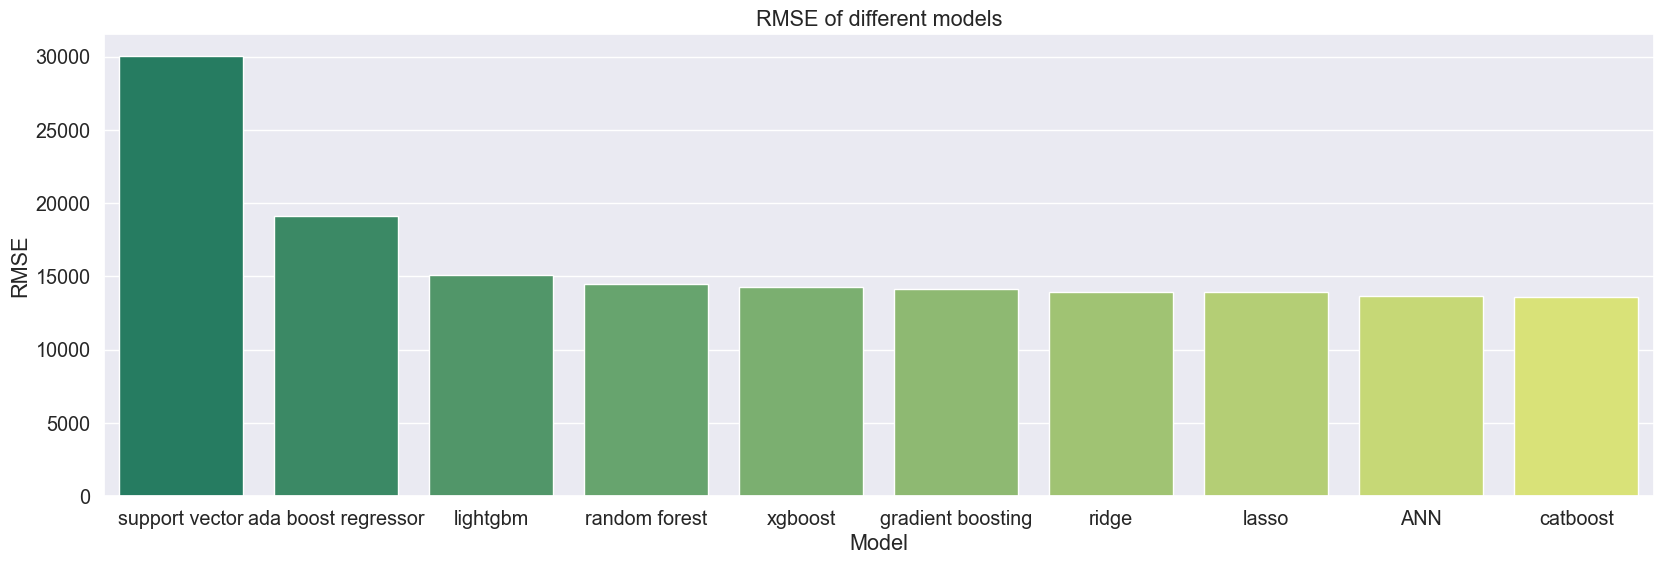

In [37]:
plt.figure(figsize = (20, 6))
sns.barplot(x = results_df.index, y = results_df["RMSE"], palette = "summer")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE of different models")

In [38]:
final_predictions = (
    0.50 * model.predict(X_test.to_numpy()).reshape(53) +
    0.20 * models["catboost"].predict(X_test) + 
    0.15 * models["gradient boosting"].predict(X_test) +
    0.10 * models["random forest"].predict(X_test) +
    0.05 * models["xgboost"].predict(X_test)
)

In [39]:
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, final_predictions))}")
print(f"R-square: {r2_score(y_test, final_predictions)}")

RMSE: 12686.545691971467
R-square: 0.8052102467422255


## 5. Evaluation

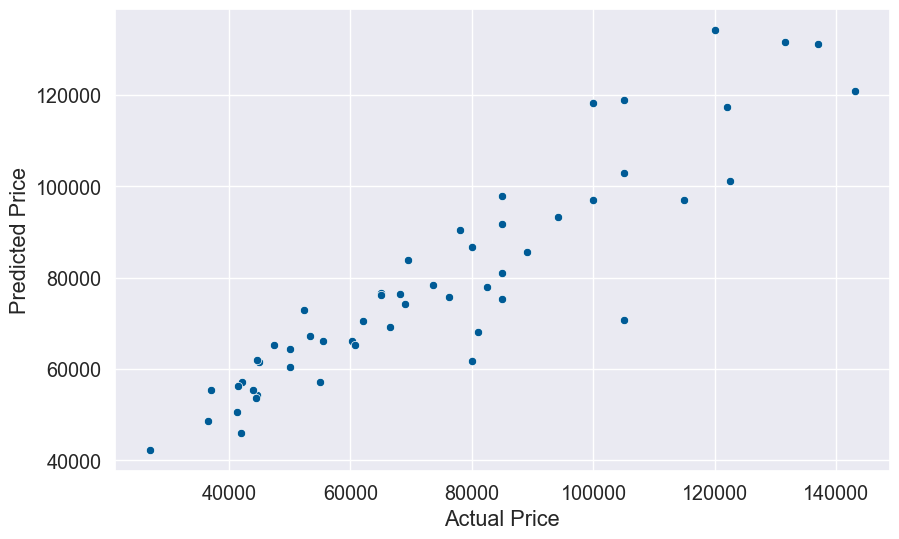

In [40]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y = final_predictions, color = "#005b96")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

Text(0.5, 0, 'Error')

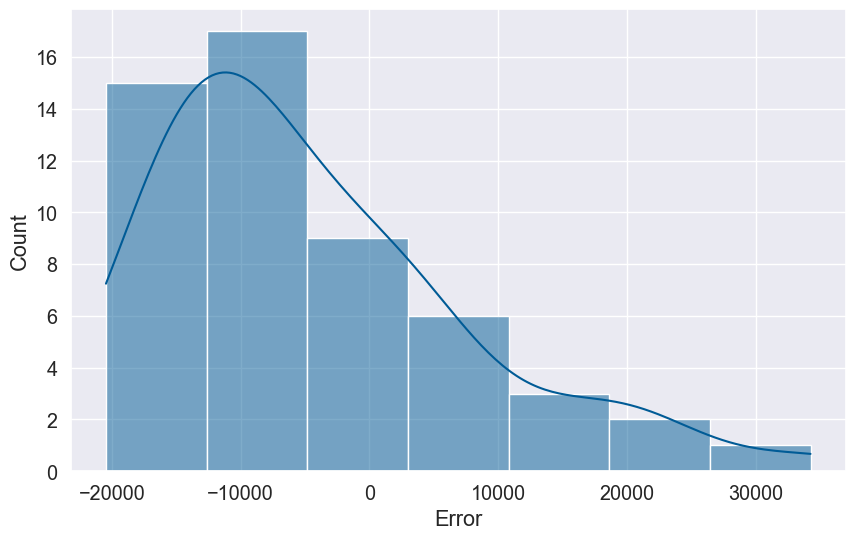

In [41]:
plt.figure(figsize = (10, 6))
sns.histplot(y_test - final_predictions, color = "#005b96", kde = True)
plt.xlabel("Error")